<img src="http://drive.google.com/uc?export=view&id=1tpOCamr9aWz817atPnyXus8w5gJ3mIts" width=500px>

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

#  Top-n list of restaurants on consumer preference

### INDUSTRY CASE STUDY - Popularity based + Collborative Filtering Based Recommendation system
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

## Case study problem statement:

### Context:

The dataset was obtained from a recommender system prototype. The task was to generate a top-n list of restaurants according to 
the consumer preferences.


### Input data details : https://archive.ics.uci.edu/ml/machine-learning-databases/00232/

(In here you will find rating_final.csv inside RCdata folder to be used)

### Expected output details: Restaurant recommendation system

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

### Steps

#### 1. Input libraries

#### 2. Data Analysis and preparation

#### 3. Popularity based Recommendation System

#### 4. Collaborative Filtering Recommendation System

#### 5. Insights

#### 6. Optional

### 1. Input libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
!pip install surprise

  Using cached surprise-0.1-py2.py3-none-any.whl (1.8 kB)


In [2]:
import numpy as np
import pandas as pd
import math
import json
import time
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.simplefilter('ignore')
%matplotlib inline

from surprise import Dataset 
from surprise import Reader
from surprise.model_selection import train_test_split
from surprise import accuracy
from surprise.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.metrics import confusion_matrix, precision_score, recall_score,classification_report

## 2. Data Analysis and preparation

### 2.1 Read the dataset and check info to understand the dataset

In [3]:
df = pd.read_csv("restaurant+rating_final.csv")  # reading csv file into pd.Dataframe

In [4]:
df.shape

(1161, 5)

In [5]:
print("The shape of Dataset is : ","\nRows : %d" % df.shape[0],"\nColums: %d" % df.shape[1])

The shape of Dataset is :  
Rows : 1161 
Colums: 5


In [6]:
df.head()  # Checking the data head

,userID,placeID,rating,food_rating,service_rating
0,U1077,135085,2,2,2
1,U1077,135038,2,2,1
2,U1077,132825,2,2,2
3,U1077,135060,1,2,2
4,U1068,135104,1,1,2


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1161 entries, 0 to 1160
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   userID          1161 non-null   object
 1   placeID         1161 non-null   int64 
 2   rating          1161 non-null   int64 
 3   food_rating     1161 non-null   int64 
 4   service_rating  1161 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 45.5+ KB


All the features are of int64 type except for userID which is a object storing string values

### 2.2 Check statistical summary and write your observations

In [7]:
df.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
userID,1161,138,U1061,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
placeID,1161,NaN,NaN,NaN,134192,1100.92,132560,132856,135030,135059,135109
rating,1161,NaN,NaN,NaN,1.19983,0.773282,0,1,1,2,2
food_rating,1161,NaN,NaN,NaN,1.21533,0.792294,0,1,1,2,2
service_rating,1161,NaN,NaN,NaN,1.09044,0.790844,0,0,1,2,2


- There are 138 unique users in the dataset, userID = 1061 has rated most i.e 18 times
- placeID is a numerical ID so analysing its 5 point summary is not that important
- rating value range between 0 to 2
- food_rating value range between 0 to 2
- service_rating value range between 0 to 2


### 2.3 Check if there are any missing values

In [9]:
df.isna().sum()  

userID            0
placeID           0
rating            0
food_rating       0
service_rating    0
dtype: int64

There are no missing values in the dataset

### 2.4 Check minimum and maximum values for rating feature. Display its frequency distribution using appropriate graph

In [10]:
print("The minimum rating is : %d" % min(df["rating"]))

The minimum rating is : 0


In [11]:
print("The minimum rating is : %d" % max(df["rating"]))

The minimum rating is : 2


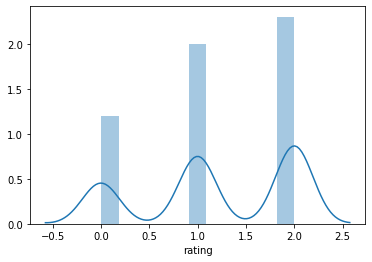

In [12]:
sns.distplot(df["rating"])

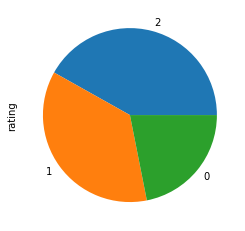

In [13]:
df["rating"].value_counts().plot(kind='pie')

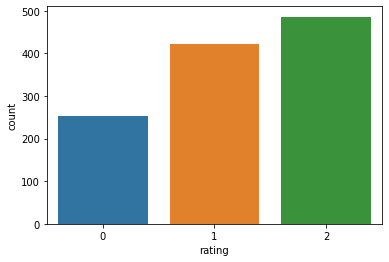

In [17]:
sns.countplot(df.rating)

- Here pie chart gives the best visualization for ratings

### 2.5 Check number of unique users and items (places) in the data

In [15]:
print("The no. of unique user are : %d" % len(df["userID"].unique()))

The no. of unique user are : 138


In [16]:
print("The no. of unique places are : %d" % len(df["placeID"].unique()))

The no. of unique places are : 130


In [17]:
# Another way :
#print("The no. of unique user are : %d" % df["userID"].nunique())
#print("The no. of unique places are : %d" % df["placeID"].nunique())

### 2.6 Sort users by their number of ratings and display top 10 users who have given most number of ratings

In [18]:
df.groupby("userID")["rating"].count().sort_values(ascending=False).head(10)

userID
U1061    18
U1106    18
U1134    16
U1024    15
U1022    14
U1089    14
U1137    14
U1135    14
U1003    13
U1016    13
Name: rating, dtype: int64

In [19]:
df.groupby("userID")["rating"].size().sort_values(ascending=False).head(10)

userID
U1061    18
U1106    18
U1134    16
U1024    15
U1022    14
U1089    14
U1137    14
U1135    14
U1003    13
U1016    13
Name: rating, dtype: int64

In [20]:
df.groupby("userID").agg({'placeID':'count'}).reset_index()

,userID,placeID
0,U1001,9
1,U1002,10
2,U1003,13
3,U1004,8
4,U1005,9
...,...,...
133,U1134,16
134,U1135,14
135,U1136,10
136,U1137,14


### 2.7. Take subset of dataset to make it less sparse/more dense. (For example, keep the users only who has given 5 or more number of ratings). Report shape of the final dataset

In [21]:
counts = df["userID"].value_counts()
counts

U1106    18
U1061    18
U1134    16
U1024    15
U1089    14
         ..
U1107     3
U1047     3
U1017     3
U1039     3
U1070     3
Name: userID, Length: 138, dtype: int64

In [22]:
df_final = df[df['userID'].isin(counts[counts>=5].index)]

In [23]:
df_final.shape

(1079, 5)

In [24]:
df.shape

(1161, 5)

In [25]:
print("The shape of final Dataset is : ","\nRows : %d" % df_final.shape[0],"\nColums: %d" % df_final.shape[1])

The shape of final Dataset is :  
Rows : 1079 
Colums: 5


### 2.8 Check number os unique users and items and comment on which kind of collaborative filtering should be applied

In [26]:
print("The no. of unique user are : %d" % df_final["userID"].nunique())
print("The no. of unique places are : %d" % df_final["placeID"].nunique())

The no. of unique user are : 115
The no. of unique places are : 129


#### In this Case both user-user and item-item collaborative filtering can be applied and we should check which is performing good among the two

## 3. Popularity Recommender model. (Non-personalised)

### 3.1 Check count of user_id for each unique product and save it as score 

In [27]:
data = df_final.groupby('placeID').agg({'userID':'count'}).reset_index()  # In agg we can reset the index
data

,placeID,userID
0,132560,4
1,132561,2
2,132564,1
3,132572,15
4,132583,4
...,...,...
124,135088,3
125,135104,7
126,135106,10
127,135108,11


In [28]:
data.rename(columns={'userID':'score'},inplace=True)

In [29]:
data.head()

,placeID,score
0,132560,4
1,132561,2
2,132564,1
3,132572,15
4,132583,4


### 3.2 Sort the products based on the score (calculated above)

In [30]:
data.sort_values(['score','placeID'],ascending=False) # total no. of ratings recieved by each place

,placeID,score
122,135085,36
30,132825,32
79,135032,28
97,135052,25
32,132834,25
...,...,...
1,132561,2
58,134975,1
19,132715,1
17,132668,1


In [31]:
mean_rating = df_final['rating'].mean(axis=0)  # mean rating in whole df_final
mean_rating

1.1983317886932345

In [32]:
df_final.groupby('placeID')['rating'].mean().sort_values(ascending=False).head(10)  # sorted mean rating of each place


placeID
132955    2.000000
134986    2.000000
135034    2.000000
134976    2.000000
132922    1.800000
132755    1.800000
135074    1.750000
135055    1.714286
135075    1.692308
134996    1.666667
Name: rating, dtype: float64

### 3.3 Create a new column called 'Rank' having the ascending recommendation rank based upon score 

In [33]:
data_sorted = data.sort_values(['score','placeID'],ascending=False)
data_sorted

,placeID,score
122,135085,36
30,132825,32
79,135032,28
97,135052,25
32,132834,25
...,...,...
1,132561,2
58,134975,1
19,132715,1
17,132668,1


In [34]:
data_sorted['Rank'] = data_sorted['score'].rank(ascending=0,method='first') # method = first

In [35]:
data_sorted.head()

,placeID,score,Rank
122,135085,36,1.0
30,132825,32,2.0
79,135032,28,3.0
97,135052,25,4.0
32,132834,25,5.0


In [36]:
data_sorted['Rank'] = data_sorted['score'].rank(ascending=0,method='average') # method = average

In [37]:
data_sorted.head()

,placeID,score,Rank
122,135085,36,1.0
30,132825,32,2.0
79,135032,28,3.0
97,135052,25,4.5
32,132834,25,4.5


In [38]:
data_sorted['Rank'] = data_sorted['score'].rank(ascending=0,method='dense') # method = dense

In [39]:
data_sorted.head()

,placeID,score,Rank
122,135085,36,1.0
30,132825,32,2.0
79,135032,28,3.0
97,135052,25,4.0
32,132834,25,4.0


### 3.4 Get the top 10 recommendation based on their rank

In [40]:
data_sorted.head(10) # top 10 recommendations

,placeID,score,Rank
122,135085,36,1.0
30,132825,32,2.0
79,135032,28,3.0
97,135052,25,4.0
32,132834,25,4.0
83,135038,24,5.0
104,135060,22,6.0
105,135062,21,7.0
87,135042,20,8.0
102,135058,18,9.0


In [41]:
data_sorted[data_sorted['Rank']<=10] # recommendation till rank = 10

,placeID,score,Rank
122,135085,36,1.0
30,132825,32,2.0
79,135032,28,3.0
97,135052,25,4.0
32,132834,25,4.0
83,135038,24,5.0
104,135060,22,6.0
105,135062,21,7.0
87,135042,20,8.0
102,135058,18,9.0


## 4. Collaborative Filtering model

### 4.1 Define rating scale and convert dataframe into surprise dataset

In [42]:
reader = Reader(rating_scale=(0,2))
data = Dataset.load_from_df(df_final[['userID','placeID','rating']],reader)  # here order is important 
data

### 4.2 Split the above surprise dataset into train and test set using surprise split function

In [43]:
trainset,testset = train_test_split(data,test_size=0.25,random_state=42)

In [44]:
testset

[('U1024', 132834, 1.0),
 ('U1061', 135075, 2.0),
 ('U1002', 132925, 1.0),
 ('U1048', 135065, 2.0),
 ('U1003', 132755, 2.0),
 ('U1024', 132825, 1.0),
 ('U1113', 135032, 0.0),
 ('U1075', 135050, 2.0),
 ('U1088', 135041, 2.0),
 ('U1118', 135021, 2.0),
 ('U1073', 132951, 0.0),
 ('U1015', 135054, 1.0),
 ('U1053', 135076, 1.0),
 ('U1003', 132825, 2.0),
 ('U1087', 132667, 2.0),
 ('U1088', 135051, 2.0),
 ('U1015', 132869, 2.0),
 ('U1076', 135027, 0.0),
 ('U1022', 135073, 2.0),
 ('U1097', 132955, 2.0),
 ('U1037', 132830, 2.0),
 ('U1118', 132768, 0.0),
 ('U1014', 135081, 2.0),
 ('U1056', 135076, 2.0),
 ('U1084', 135030, 2.0),
 ('U1124', 135069, 1.0),
 ('U1036', 135045, 2.0),
 ('U1057', 135043, 1.0),
 ('U1006', 135048, 1.0),
 ('U1097', 132861, 2.0),
 ('U1061', 135080, 2.0),
 ('U1096', 135064, 1.0),
 ('U1055', 132572, 2.0),
 ('U1032', 135079, 2.0),
 ('U1035', 134996, 2.0),
 ('U1061', 132955, 2.0),
 ('U1096', 135086, 1.0),
 ('U1033', 135028, 2.0),
 ('U1010', 135053, 1.0),
 ('U1134', 135055, 2.0),


In [45]:
trainset

### 4.3 Print size of train and test set

In [46]:
df_final.shape

(1079, 5)

In [47]:
test_data = pd.DataFrame(testset)

In [48]:
test_data.head()

,0,1,2
0,U1024,132834,1.0
1,U1061,135075,2.0
2,U1002,132925,1.0
3,U1048,135065,2.0
4,U1003,132755,2.0


In [49]:
test_data.shape

(270, 3)

In [50]:
# To view trainset as its not directly visible in the surprise library

userIds = []
placeIds = []
ratings = []

for (uid,iid,rating) in trainset.all_ratings():
    userIds.append(trainset.to_raw_uid(uid))
    placeIds.append(trainset.to_raw_iid(iid))
    ratings.append(rating)
dict= {'userId':userIds,'placeIds':placeIds,'rating':ratings}
training_df = pd.DataFrame(dict)

In [51]:
training_df.head()

,userId,placeIds,rating
0,U1071,135052,2.0
1,U1071,135025,2.0
2,U1071,135039,2.0
3,U1071,135060,1.0
4,U1071,135032,2.0


In [52]:
trainset.n_ratings

809

In [53]:
trainset.n_items

126

In [54]:
trainset.n_users

115

In [55]:
len(testset)

270

### 4.4 Build a default SVd model using train set

In [56]:
from surprise import SVD
svd_model = SVD(random_state=42)   # intantiating the SVD
svd_model.fit(trainset)            # fit SVD on trainset   

### 4.5 Make prediction for test set and convert test prediction into a dataframe

In [57]:
train_pred = svd_model.test(trainset.build_testset()) # making predictions on trainset

In [58]:
train_pred

[Prediction(uid='U1071', iid=135052, r_ui=2.0, est=1.85206733213222, details={'was_impossible': False}),
 Prediction(uid='U1071', iid=135025, r_ui=2.0, est=1.9651570962500218, details={'was_impossible': False}),
 Prediction(uid='U1071', iid=135039, r_ui=2.0, est=1.6872660396937882, details={'was_impossible': False}),
 Prediction(uid='U1071', iid=135060, r_ui=1.0, est=1.473283647400698, details={'was_impossible': False}),
 Prediction(uid='U1071', iid=135032, r_ui=2.0, est=1.733010350516117, details={'was_impossible': False}),
 Prediction(uid='U1071', iid=132856, r_ui=2.0, est=1.4247301600878552, details={'was_impossible': False}),
 Prediction(uid='U1071', iid=135042, r_ui=2.0, est=1.8083581479743682, details={'was_impossible': False}),
 Prediction(uid='U1071', iid=132834, r_ui=1.0, est=1.5259597414078137, details={'was_impossible': False}),
 Prediction(uid='U1071', iid=135063, r_ui=2.0, est=1.6508383653180643, details={'was_impossible': False}),
 Prediction(uid='U1071', iid=135030, r_ui

In [59]:
test_pred = svd_model.test(testset) # making predictions on the testset

In [63]:
test_pred

[Prediction(uid='U1024', iid=132834, r_ui=1.0, est=1.3270977290825556, details={'was_impossible': False}),
 Prediction(uid='U1061', iid=135075, r_ui=2.0, est=1.4695695862933846, details={'was_impossible': False}),
 Prediction(uid='U1002', iid=132925, r_ui=1.0, est=0.9721753194627853, details={'was_impossible': False}),
 Prediction(uid='U1048', iid=135065, r_ui=2.0, est=1.2116639527158946, details={'was_impossible': False}),
 Prediction(uid='U1003', iid=132755, r_ui=2.0, est=1.6543250295997045, details={'was_impossible': False}),
 Prediction(uid='U1024', iid=132825, r_ui=1.0, est=1.2286816101252758, details={'was_impossible': False}),
 Prediction(uid='U1113', iid=135032, r_ui=0.0, est=1.0770561368138445, details={'was_impossible': False}),
 Prediction(uid='U1075', iid=135050, r_ui=2.0, est=1.2983363982511347, details={'was_impossible': False}),
 Prediction(uid='U1088', iid=135041, r_ui=2.0, est=1.2419986480821847, details={'was_impossible': False}),
 Prediction(uid='U1118', iid=135021, 

In [64]:
pred_df = pd.DataFrame(test_pred)  # converting the predictions into a dataframe
pred_df.head()

,uid,iid,r_ui,est,details
0,U1024,132834,1.0,1.327098,{'was_impossible': False}
1,U1061,135075,2.0,1.469570,{'was_impossible': False}
2,U1002,132925,1.0,0.972175,{'was_impossible': False}
3,U1048,135065,2.0,1.211664,{'was_impossible': False}
4,U1003,132755,2.0,1.654325,{'was_impossible': False}


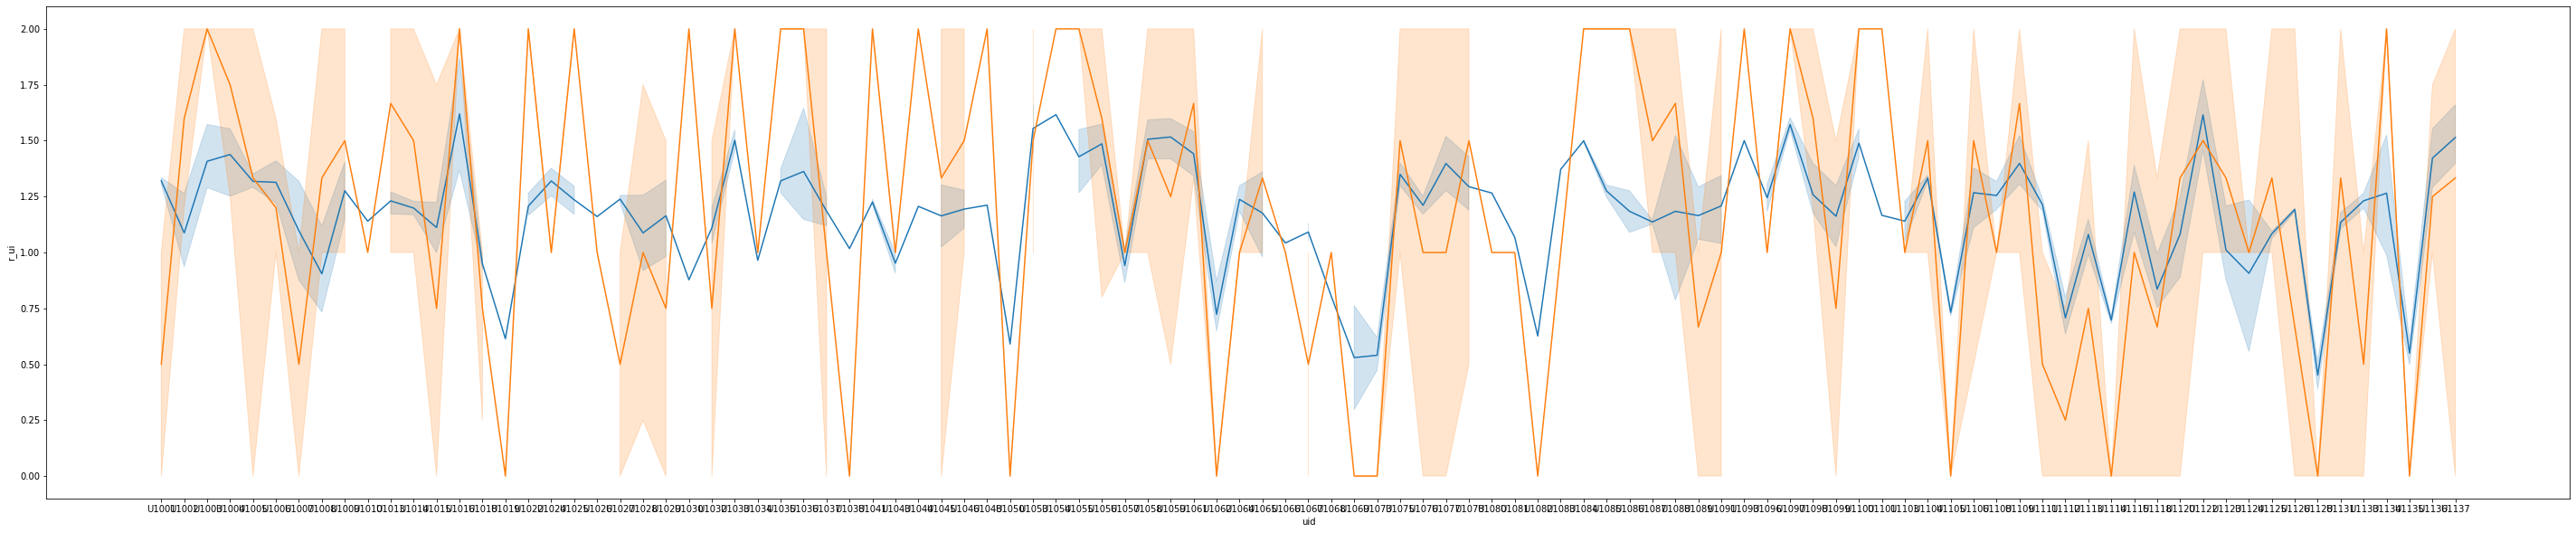

In [65]:
# Visualizing the variation in the original rating and estimated rating

plt.figure(figsize=(50,10))
sns.lineplot(pred_df['uid'],pred_df['est'])
sns.lineplot(pred_df['uid'],pred_df['r_ui'])

### 4.6 Check RMSe and MAE of train and test predictions

In [66]:
accuracy.rmse(train_pred)  # RMSE for trainset

RMSE: 0.4602


0.4601727343094762

In [67]:
accuracy.mae(train_pred)  # MAE for trainset

MAE:  0.3870


0.386951212776718

In [68]:
accuracy.rmse(test_pred) # RMSR for testset

RMSE: 0.7007


0.7007460487638949

In [69]:
accuracy.mae(test_pred)  #MAE for testset

MAE:  0.6061


0.6061132114267419

### 4.7 Write a function to make top n recommendation to a user. The function should take a userID, data, and n as input arguments

In [73]:
from collections import defaultdict
def get_top_n(predictions, n):
    # First map the predictions to each user.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

In [74]:
top_n = get_top_n(test_pred,n=10)
top_n

defaultdict(list,
            {'U1024': [(135028, 1.4260929075430013),
              (132834, 1.3270977290825556),
              (135042, 1.2979528920655141),
              (132825, 1.2286816101252758)],
             'U1061': [(132921, 1.6512194043151598),
              (132955, 1.5507238603474427),
              (135075, 1.4695695862933846),
              (135048, 1.3686690445645853),
              (132825, 1.3575371483566907),
              (135080, 1.2491942215275955)],
             'U1002': [(132862, 1.3590632836690748),
              (132921, 1.2702032798345118),
              (132925, 0.9721753194627853),
              (132825, 0.931580623401915),
              (135106, 0.9043563424418646)],
             'U1048': [(135065, 1.2116639527158946)],
             'U1003': [(132755, 1.6543250295997045),
              (132825, 1.3947694441656169),
              (135080, 1.3277316110235085),
              (132723, 1.255400642894155)],
             'U1113': [(135038, 1.172271626713926),
  

In [75]:
# Function for returning the recommedation for a given userid

from collections import defaultdict
def get_top_n_userid(predictions,userid, n):
    # First map the predictions to each user.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n[userid]

### 4.8 Check top 3 recommendations for userID:- 'U1028'

In [76]:
get_top_n_userid(test_pred,'U1028' ,n=3)

[(132630, 1.2615479062192472),
 (132663, 1.2506769207628663),
 (132732, 0.9954172800399229)]

## 5. Summarize your insights

Popularity based recommendation Systems recommends same items to users, in collaborative we are getting diffent items for recommendations, i.e it is personalized. As we can see that rmse and mae values are not very less for collaborative filtering recommendation systems, this might be due to lack of data and we need more data for creating better recommendation systems.


## Optional
### Use GridSearch CV to get the best parameters for SVD model

In [77]:
param = {"n_factors" : list(range(50,200,20))}
Tuners = GridSearchCV(SVD,param, measures=['rmse'],cv=3)
Tuners.fit(data)

In [78]:
Tuners.best_params['rmse']

{'n_factors': 90}

In [79]:
Tuners.best_score['rmse']

0.6700042405134029